In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.shape

(768, 9)

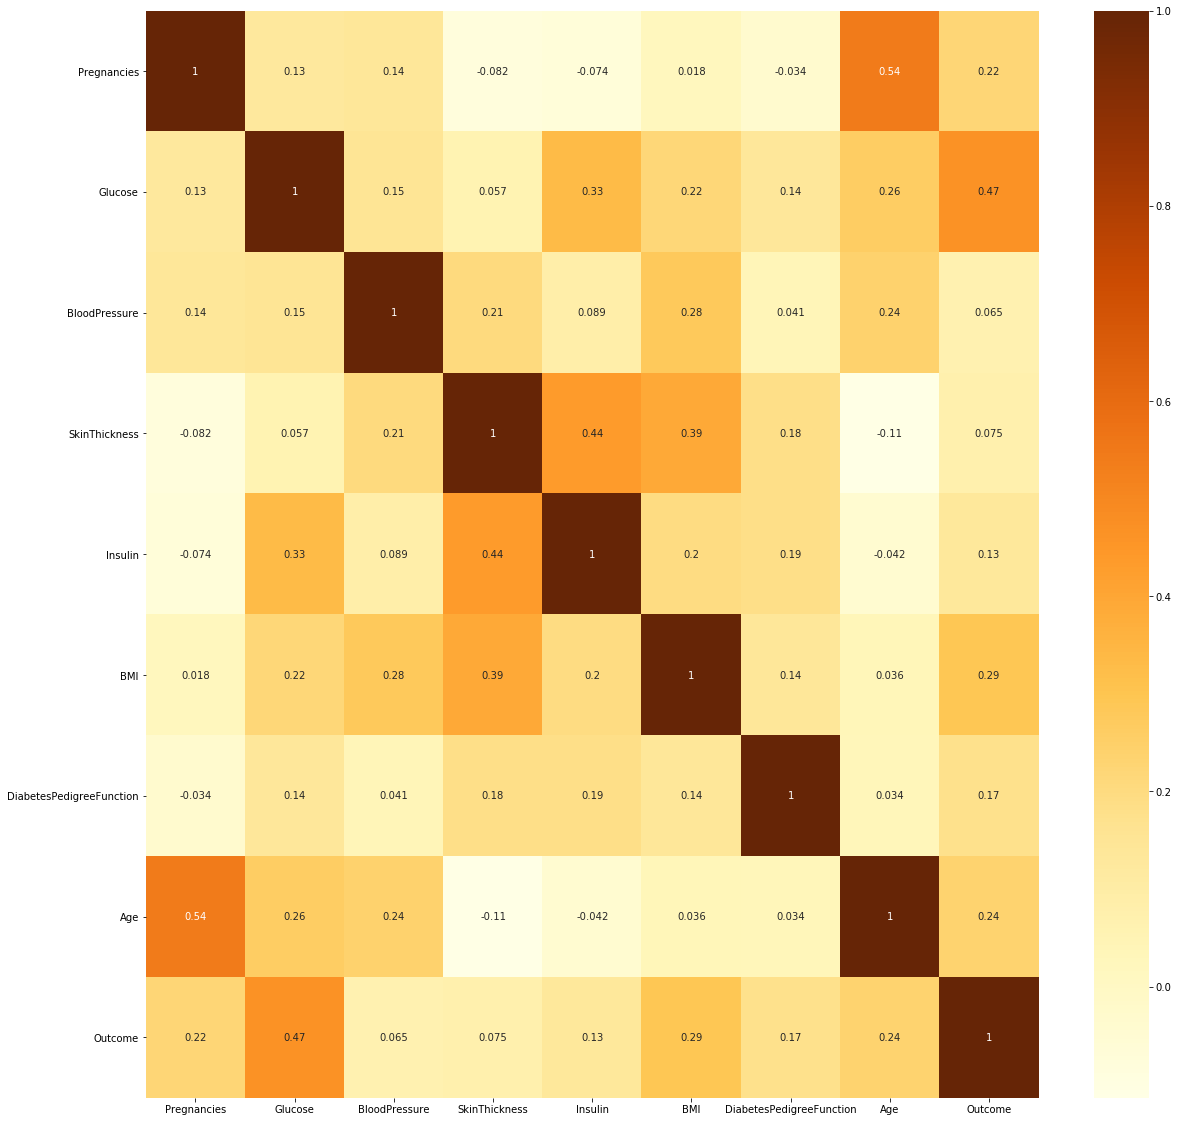

In [6]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot = True ,cmap = 'YlOrBr')

In [7]:
def correlation(dataset,threshold):
    output=set()
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i,j]) > threshold:
                   colname  = corr[i]
                   output.add(colname)
            return output

In [8]:
correlation(df,0.7)

set()

In [9]:
X = df.drop(['Outcome'], axis = 'columns')
y = df.Outcome

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X,y):
    algos = {
        'DecisionTreeClassifier' : {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion' : ['gini', 'entropy'],
                'splitter' :['best', 'random']
                
            }
        },
        'Support_Vector_Machine': {
            'model': SVC(),
            'params': {
                'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
                'gamma': ['scale']
            }
        },
      'Random_Forest_Classifier': {
            'model': RandomForestClassifier(),
            'params' : {
              'criterion' : ['gini', 'entropy'],
               'n_estimators' : [100,200,300,400,500,600,700,800,900,1000,1100,1200]
          }
        }
    }
    scores = []
    for algo_name, config in algos.items():
        gcv =  GridSearchCV(config['model'], config['params'], cv=5,verbose= 2,return_train_score=False)
        gcv.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gcv.best_score_,
            'best_params':gcv.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] criterion=gini, splitter=best ...................................
[CV] .................... criterion=gini, splitter=best, total=   0.0s
[CV] criterion=gini, splitter=best ...................................
[CV] .................... criterion=gini, splitter=best, total=   0.0s
[CV] criterion=gini, splitter=best ...................................
[CV] .................... criterion=gini, splitter=best, total=   0.0s
[CV] criterion=gini, splitter=best ...................................
[CV] .................... criterion=gini, splitter=best, total=   0.0s
[CV] criterion=gini, splitter=best ...................................
[CV] .................... criterion=gini, splitter=best, total=   0.0s
[CV] criterion=gini, splitter=random .................................
[CV] .................. criterion=gini, splitter=random, total=   0.0s
[CV] criterion=gini, splitter=random .................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] criterion=entropy, splitter=best ................................
[CV] ................. criterion=entropy, splitter=best, total=   0.0s
[CV] criterion=entropy, splitter=best ................................
[CV] ................. criterion=entropy, splitter=best, total=   0.0s
[CV] criterion=entropy, splitter=best ................................
[CV] ................. criterion=entropy, splitter=best, total=   0.0s
[CV] criterion=entropy, splitter=best ................................
[CV] ................. criterion=entropy, splitter=best, total=   0.0s
[CV] criterion=entropy, splitter=best ................................
[CV] ................. criterion=entropy, splitter=best, total=   0.0s
[CV] criterion=entropy, splitter=random ..............................
[CV] ............... criterion=entropy, splitter=random, total=   0.0s
[CV] criterion=entropy, splitter=random ..............................
[CV] ............... criterion=entropy, splitter=random, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... gamma=scale, kernel=linear, total=   5.3s
[CV] gamma=scale, kernel=linear ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s remaining:    0.0s


[CV] ....................... gamma=scale, kernel=linear, total=   8.4s
[CV] gamma=scale, kernel=linear ......................................
[CV] ....................... gamma=scale, kernel=linear, total=   5.7s
[CV] gamma=scale, kernel=linear ......................................
[CV] ....................... gamma=scale, kernel=linear, total=   5.0s
[CV] gamma=scale, kernel=linear ......................................
[CV] ....................... gamma=scale, kernel=linear, total=   4.2s
[CV] gamma=scale, kernel=poly ........................................
[CV] ......................... gamma=scale, kernel=poly, total=   0.0s
[CV] gamma=scale, kernel=poly ........................................
[CV] ......................... gamma=scale, kernel=poly, total=   0.0s
[CV] gamma=scale, kernel=poly ........................................
[CV] ......................... gamma=scale, kernel=poly, total=   0.0s
[CV] gamma=scale, kernel=poly ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   28.9s finished


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] criterion=gini, n_estimators=100 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. criterion=gini, n_estimators=100, total=   0.3s
[CV] criterion=gini, n_estimators=100 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ................. criterion=gini, n_estimators=100, total=   0.4s
[CV] criterion=gini, n_estimators=100 ................................
[CV] ................. criterion=gini, n_estimators=100, total=   0.5s
[CV] criterion=gini, n_estimators=100 ................................
[CV] ................. criterion=gini, n_estimators=100, total=   0.4s
[CV] criterion=gini, n_estimators=100 ................................
[CV] ................. criterion=gini, n_estimators=100, total=   0.4s
[CV] criterion=gini, n_estimators=200 ................................
[CV] ................. criterion=gini, n_estimators=200, total=   0.9s
[CV] criterion=gini, n_estimators=200 ................................
[CV] ................. criterion=gini, n_estimators=200, total=   0.9s
[CV] criterion=gini, n_estimators=200 ................................
[CV] ................. criterion=gini, n_estimators=200, total=   0.8s
[CV] criterion=gini, n_estimators=200 ................................
[CV] .

[CV] ................ criterion=gini, n_estimators=1200, total=   5.2s
[CV] criterion=entropy, n_estimators=100 .............................
[CV] .............. criterion=entropy, n_estimators=100, total=   0.6s
[CV] criterion=entropy, n_estimators=100 .............................
[CV] .............. criterion=entropy, n_estimators=100, total=   0.4s
[CV] criterion=entropy, n_estimators=100 .............................
[CV] .............. criterion=entropy, n_estimators=100, total=   0.5s
[CV] criterion=entropy, n_estimators=100 .............................
[CV] .............. criterion=entropy, n_estimators=100, total=   0.5s
[CV] criterion=entropy, n_estimators=100 .............................
[CV] .............. criterion=entropy, n_estimators=100, total=   0.4s
[CV] criterion=entropy, n_estimators=200 .............................
[CV] .............. criterion=entropy, n_estimators=200, total=   1.0s
[CV] criterion=entropy, n_estimators=200 .............................
[CV] .

[CV] ............. criterion=entropy, n_estimators=1200, total=   5.4s
[CV] criterion=entropy, n_estimators=1200 ............................
[CV] ............. criterion=entropy, n_estimators=1200, total=   5.6s
[CV] criterion=entropy, n_estimators=1200 ............................
[CV] ............. criterion=entropy, n_estimators=1200, total=   5.4s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  5.7min finished


,model,best_score,best_params
0,DecisionTreeClassifier,0.700326,"{'criterion': 'entropy', 'splitter': 'best'}"
1,Support_Vector_Machine,0.775244,"{'gamma': 'scale', 'kernel': 'linear'}"
2,Random_Forest_Classifier,0.775244,"{'criterion': 'entropy', 'n_estimators': 800}"


In [19]:
model = SVC(gamma = 'scale' ,kernel = 'linear')
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
prediction = model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [22]:
print("Accuracy:",accuracy_score(y_test, prediction))
print ("Recall:", recall_score(y_test, prediction,average='macro'))
print ("Precision:", precision_score(y_test, prediction,average='macro'))
print ("F1 Score:", f1_score(y_test, prediction,average='macro'))

Accuracy: 0.7922077922077922
Recall: 0.7446192801591608
Precision: 0.8015607580824973
F1 Score: 0.7578616352201257


In [24]:
import pickle
file = open('model.pkl','wb')
pickle.dump(model,file)